In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

df=pd.read_csv('Medicare_Provider_Utilization_and_Payment_Data__Part_D_Prescriber_Summary_Table_CY2017.csv')

cols=['total_claim_count','total_drug_cost','bene_count','brand_claim_count','generic_claim_count','lis_claim_count','opioid_claim_count','la_opioid_claim_count','antibiotic_claim_count','antipsych_claim_count_ge65','beneficiary_average_risk_score']




In [2]:
#Beneficiary > 10
df1=df[df.bene_count.isna()==False]

#Fill NA
df2=df1[cols].fillna(7)

df_Pscrb=df2.values

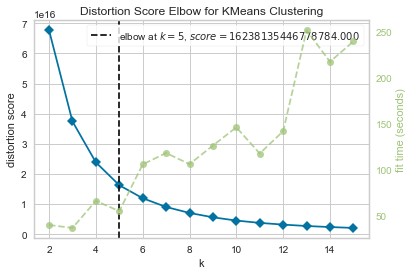

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
Elbow_Chart = KElbowVisualizer(KMeans(init='k-means++'), k=(2,16))
Elbow_Chart.fit(df_Pscrb)       #Selection of K
Elbow_Chart.show()

In [4]:
clusters = KMeans(n_clusters=5, init='k-means++').fit(df_Pscrb)

df_cluster=pd.DataFrame(clusters.cluster_centers_,columns=cols)

In [5]:
print(df_cluster)

   total_claim_count  total_drug_cost  bene_count  brand_claim_count  \
0         504.684391     3.362843e+04  103.391623          63.076889   
1        9099.191843     2.584275e+06  502.627614        2116.445512   
2        8403.451200     1.125889e+06  496.812796        1577.204695   
3       13766.197546     6.356035e+06  650.465031        3793.539877   
4        4785.767330     4.206317e+05  378.097683         782.760022   

   generic_claim_count  lis_claim_count  opioid_claim_count  \
0           398.403299       201.484651           34.702524   
1          6688.397714      5823.506300          395.173139   
2          6630.533486      4117.748409          380.632827   
3          9523.802454     10621.110429          462.177914   
4          3894.605619      1856.928735          211.369028   

   la_opioid_claim_count  antibiotic_claim_count  antipsych_claim_count_ge65  \
0               3.802291               39.284577                    3.999893   
1              60.416807    

In [6]:
df1['cluster']=clusters.predict(df_Pscrb)

/Users/nidhikalra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
df1.to_csv('clusters.csv')